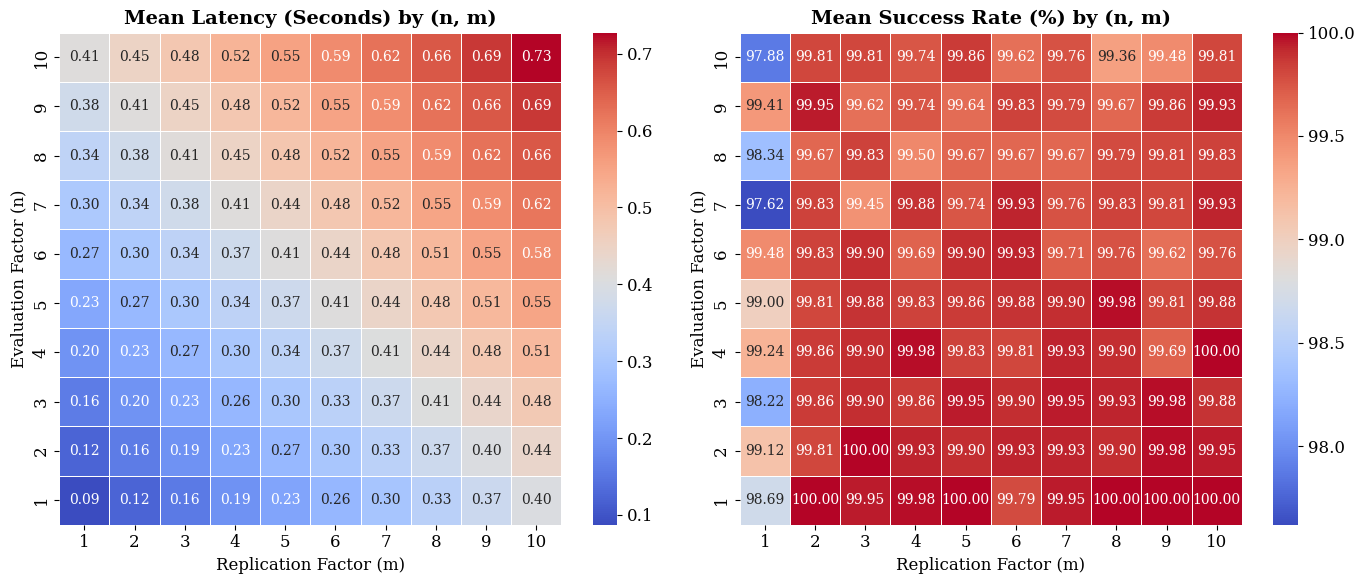

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set global font settings to a serif font like Times New Roman
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12  # Adjust to match academic text size

# Load the CSV file
file_path = "../experiment-1.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert latency from milliseconds to seconds
df['lat_mean'] = df['lat_mean'] / 1000

# Group data by (n_ev, n_ms) and compute mean latency and success rate
grouped = df.groupby(['n_ev', 'n_ms']).agg({'lat_mean': 'mean', 'success_rate': 'mean'}).reset_index()

# Pivot tables for heatmap visualization
latency_pivot_seconds = grouped.pivot(index='n_ev', columns='n_ms', values='lat_mean')
success_pivot = grouped.pivot(index='n_ev', columns='n_ms', values='success_rate')

# Create a figure for both heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Latency Heatmap
sns.heatmap(latency_pivot_seconds.sort_index(ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0],
            annot_kws={"fontsize": 10})  # Adjusted annotation size

axes[0].set_title('Mean Latency (Seconds) by (n, m)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Replication Factor (m)', fontsize=12)
axes[0].set_ylabel('Evaluation Factor (n)', fontsize=12)

# Save the latency heatmap as a PDF
plt.figure(figsize=(8, 6))
sns.heatmap(latency_pivot_seconds.sort_index(ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mean Latency (Seconds) by (n, m)', fontsize=14, fontweight='bold')
plt.xlabel('Replication Factor (m)', fontsize=12)
plt.ylabel('Evaluation Factor (n)', fontsize=12)
plt.savefig("../latency_heatmap.pdf", bbox_inches='tight')
plt.close()

# Success Rate Heatmap
sns.heatmap(success_pivot.sort_index(ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1],
            annot_kws={"fontsize": 10})  # Adjusted annotation size

axes[1].set_title('Mean Success Rate (%) by (n, m)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Replication Factor (m)', fontsize=12)
axes[1].set_ylabel('Evaluation Factor (n)', fontsize=12)

# Save the success rate heatmap as a PDF
plt.figure(figsize=(8, 6))
sns.heatmap(success_pivot.sort_index(ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mean Success Rate (%) by (n, m)', fontsize=14, fontweight='bold')
plt.xlabel('Replication Factor (m)', fontsize=12)
plt.ylabel('Evaluation Factor (n)', fontsize=12)
plt.savefig("../success_rate_heatmap.pdf", bbox_inches='tight')
plt.close()

# Adjust layout for better visibility and show the combined heatmaps
plt.tight_layout()
plt.show()
